*   Modelagem e Simulação - Estatística e Probabilidade (Simulação da Distribuição de Poisson)

*   Felipe Daniel Dias dos Santos - 11711ECP004

*   Graduação em Engenharia de Computação - Faculdade de Engenharia Elétrica - Universidade Federal de Uberlândia

A distribuição de Poisson é uma distribuição de probabilidade de variável aleatória discreta que expressa a probabilidade de uma quantidade $k$ de eventos ocorrer, com taxa de ocorrência $λ$, num certo período de tempo, se estes eventos ocorrem independentemente de quando ocorreu o último evento. A função densidade de probabilidade d adistribuição de Poisson é dada por:

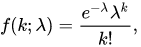

A seguir, será realizada uma simulação da distribuição de Poisson.

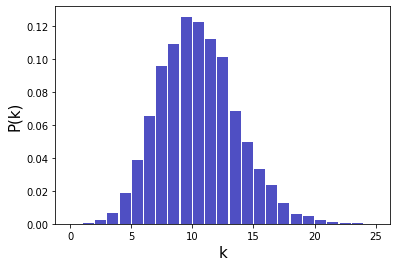

In [ ]:
#Simulação da distribuição de Poisson
#Nesse caso, a taxa de ocorrência dos eventos será de 15
#Serão realizados 10000 experimentos (extração de variáveis aleatórias)

#Declaração das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

#Taxa de ocorrência
lbd = 10

#Quantidade de pontos extraídos da distribuição de Poisson
n = 10000
P = np.random.poisson(lbd, n)
k = np.arange(0, np.max(P))

#Plotagem do gráfico da distribuição
count, bins, ignored = plt.hist(P, bins = k, density = True, color = '#0504aa', alpha = 0.7, rwidth = 0.9)
plt.xlabel('k', fontsize = 15)
plt.ylabel('P(k)',fontsize = 15)
plt.show(True)

Lei dos eventos raros: A distribuição de Poisson é obtida quando, em uma distribuição binomial, o número de experimentos tende ao infinito e a probabilidade de sucesso tende a zero. Isto é:

image.png

Na simulação a seguir, vemos que ao diminuirmos a probabilidade de sucesso e aumentarmos o número de experimentos, a distribuição binomial se aproxima da distribuição de Poisson.

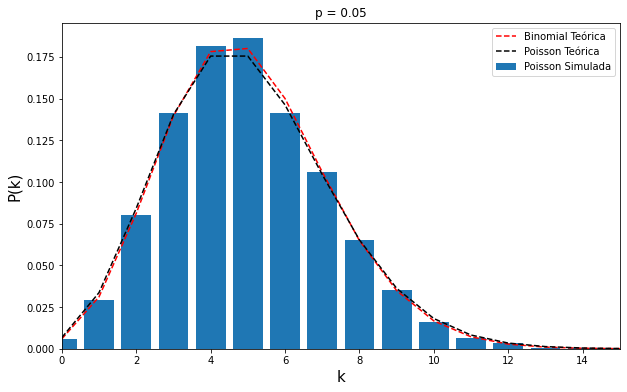

In [ ]:
#Simulação da distribuição de Poisson a partir da distribuição binomial
#Nesse caso, a distribuição binomial utilizada terá os seguintes parâmetros: probabilidade de sucesso p = 0.05 e quantidade de experimentos n = 1000 

#Declaração das bibliotecas necessárias
from random import seed
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.special import factorial

#Semente do gerador de números aleatórios
seed(100)

#Probabilidade de sucesso
p = 0.05

#Número de experimentos
n = 100

Pk = np.zeros(n)
vk = np.arange(0, n)

#Número de simulações
ns = 10000

#Realização das ns simulações
for j in range(0, ns):

    #Número de sucessos
    S = 0

    #Realização dos n experimentos
    for i in range(0, n):

        #Geração de número aleatório entre 0 e 1
        r = np.random.uniform()
  
        if(r <= p):

            S += 1
        
    Pk[S] += 1

#Normaliza a distribuição de probabilidade
Pk /= sum(Pk)

#Plotagem da distribuição de Poisson simulada
plt.figure(figsize = (10, 6))
plt.xlim(np.min(vk[Pk > 0]), np.max(vk[Pk > 0]))
plt.bar(vk, Pk, label = 'Poisson Simulada')

#Plotagem da distribuição binomial teórica
Pkt = np.zeros(n + 1)
vkt = np.arange(0, n + 1)

for k in range(0, n + 1):

    #Cálculo da distribuição binomial para os n valores, considerando p = 0.05 e n = 1000
    Pkt[k] = (factorial(n) / (factorial(n - k) * factorial(k))) * (p ** k) * (1 - p) ** (n - k)

plt.plot(vkt, Pkt, 'r--', label = 'Binomial Teórica')

#Plotagem da distribuição de Poisson teórica
Po = np.zeros(n + 1)
vo = np.arange(0, n + 1)

#Valor de lambda
lbd = n * p

for k in range(0, n + 1):
    
    #Cálculo da distribuição de Poisson para os n valores
    Po[k] = (np.exp(-lbd) * lbd ** k) / factorial(k)

plt.plot(vo, Po, 'k--', label = 'Poisson Teórica')
plt.title('p = ' + str(p))
plt.xlabel('k', fontsize = 15)
plt.ylabel('P(k)',fontsize = 15)
plt.legend()
plt.show(True)

Como podemos notar, as curvas binomial teórica se aproxima muito da Poisson teórica, dados os parâmetros adequados (alto número de experimentos e probabilidade de sucesso baixa). Além disso, a simulação realizada (obtenção da curva de Poisson por experimentação da lei dos eventos raros), se aproxima com boa precisão de ambas as curvas teóricas. Para que as curvas fossem exatamente iguais, seriam necessárias infinitas simulações, além de uma quantidade de experimentos infinitamente grande e uma probabilidade de sucesso infinitamente pequena.